# 1. Import Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

# 2. Adjust Data

In [3]:
# These stats are either duplicates or not useful for our analysis
STATS_TO_DROP = ['gk_clean_sheets_pct', 'gk_goals_against', 'gk_save_pct',
    'players_used', 'games_starts', 'minutes', 'minutes_90s', 'goals', 'assists',
    'goals_assists', 'goals_pens', 'pens_made', 'pens_att','xg', 'npxg','xg_assist', 'npxg_xg_assist', 'gk_games', 
    'gk_games_starts', 'gk_minutes','gk_saves', 'gk_wins', 'games',
    'gk_ties', 'gk_losses','gk_clean_sheets', 'gk_pens_att', 'gk_pens_allowed', 
    'gk_pens_saved', 'gk_pens_missed', 'shots', 'shots_on_target',
    'avg_age', 'goals_per90', 'assists_per90', 'goals_assists_per90',
    'goals_pens_per90', 'goals_assists_pens_per90', 'xg_per90', 'xg_assist_per90', 'xg_xg_assist_per90',
    'npxg_per90', 'npxg_xg_assist_per90', 'gk_goals_against_per90', 'gk_shots_on_target_against', 
    'gk_clean_sheets_pct', 'gk_pens_save_pct', 'gk_own_goals_against', 'gk_psxg', 
    'gk_psnpxg_per_shot_on_target_against', 'gk_psxg_net', 'gk_psxg_net_per90', 'gk_passes_completed_launched',
    'gk_passes_launched', 'gk_passes', 'gk_passes_throws', 'gk_goal_kicks', 'gk_crosses_stopped', 
    'gk_def_actions_outside_pen_area', 'shots_per90', 'shots_on_target_per90', 'gk_free_kick_goals_against',
    'goals_per_shot', 'goals_per_shot_on_target', 'average_shot_distance', 'shots_free_kicks',
    'npxg_per_shot', 'xg_net', 'npxg_net', 'passes_short', 'passes_medium', 'passes_long', 'pass_xa',
    'xg_assist_net', 'assisted_shots', 'passes_live', 'passes_dead', 'passes_free_kicks', 'crosses', 'throw_ins',
    'corner_kicks', 'corner_kicks_straight', 'sca_per90', 'gca_per90', 
    'tackles_interceptions', 'challenge_tackles', 'challenges_lost', 'touches_live_ball', 
    'take_ons_tackled', 'cards_yellow_red', 'pens_won',	'pens_conceded', 'own_goals', 'aerials_lost'


]

# These stats are too representative of the amount of games played, leading to skewed results.
# Thus we convert them to per 90 stats.
STATS_TO_PER90 = [
    'progressive_carries', 'progressive_passes', 'gk_free_kick_goals_against', 
    'passes_completed', 'cards_red', 'cards_yellow',
    'passes_total_distance', 'passes_progressive_distance', 'passes', 'passes_completed_short',
    'passes_completed_medium', 'passes_completed_long',
    'pass_xa', 'passes_into_final_third', 'gk_crosses',
    'passes_into_penalty_area', 'crosses_into_penalty_area', 
    'through_balls', 'passes_switches',
    'corner_kicks_in', 'corner_kicks_out', 'corner_kicks_straight',
    'sca_passes_live', 'sca_passes_dead',
    'sca_take_ons', 'sca_shots', 'sca_fouled', 'sca_defense', 'gca_passes_live',
    'gca_passes_dead', 'gca_take_ons', 'gca_shots', 'gca_fouled', 'gca_defense',
    'tackles', 'tackles_won', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd',
    'challenges', 'blocks', 'blocked_shots',
    'blocked_passes', 'interceptions', 'clearances', 'errors',
    'touches', 'touches_def_pen_area', 'touches_def_3rd', 'touches_mid_3rd', 'touches_att_3rd',
    'touches_att_pen_area', 'take_ons', 'take_ons_won',
    'carries', 'carries_distance', 'carries_progressive_distance',
    'carries_into_final_third', 'carries_into_penalty_area', 'miscontrols', 'dispossessed',
    'passes_received', 'progressive_passes_received', 'fouls', 'fouled',
    'offsides','ball_recoveries', 'aerials_won'

]

In [4]:
df = pd.read_csv("../data/top5Leagues.csv")

In [5]:
df['avg_carries_distance'] = df['carries_distance']/df['carries']
df['avg_progressive_carries_distance'] = df['carries_progressive_distance']/df['carries']
df['corner_kicks_conceded_pct'] = df['gk_corner_kick_goals_against']/df['gk_goals_against']
df['corner_kicks_in_pct']=df['corner_kicks_in']/(df['corner_kicks_in']+df['corner_kicks_out'])
# df['passes_offsides_pct'] = df['passes_offsides']/df['passes_completed']
# df['passes_blocked_pct'] = df['passes_blocked']/df['passes_completed']
df['sca_passes_live_pct']=df['sca_passes_live']/df['sca']
df['sca_passes_dead_pct']=df['sca_passes_dead']/df['sca']
df['sca_take_ons_pct']=df['sca_take_ons']/df['sca']
df['sca_fouled_pct']=df['sca_fouled']/df['sca']
df['sca_take_ons_pct']=df['sca_take_ons']/df['sca']
df['sca_shots_pct']=df['sca_shots']/df['sca']
df['sca_defense_pct']=df['sca_defense']/df['sca']
# df['gca_passes_live_pct']=df['gca_passes_live']/df['gca']
# df['gca_passes_dead_pct']=df['gca_passes_dead']/df['gca']
# df['gca_take_ons_pct']=df['gca_take_ons']/df['gca']
# df['gca_fouled_pct']=df['gca_fouled']/df['gca']
# df['gca_take_ons_pct']=df['gca_take_ons']/df['gca']
# df['gca_shots_pct']=df['gca_shots']/df['gca']
# df['gca_defense_pct']=df['gca_defense']/df['gca']
df['tackles_def_3rd_per90_pct']=df['tackles_def_3rd']/df['tackles']
df['tackles_mid_3rd_per90_pct']=df['tackles_mid_3rd']/df['tackles']
df['tackles_att_3rd_per90_pct']=df['tackles_att_3rd']/df['tackles']
df['blocked_passes_per90_pct'] = df['blocked_passes']/df['blocks']
df['passes_total_distance_per_pass'] = df['passes_total_distance']/df['passes_completed']
df['passes_progressive_distance_per_pass'] = df['passes_progressive_distance']/df['passes_completed']
df['points_per_match'] = (3*df['gk_wins']+df['gk_ties'])/df['gk_games']

In [6]:
df[STATS_TO_PER90] = df[STATS_TO_PER90].div(df['minutes_90s'], axis=0)
df.drop(columns=STATS_TO_DROP, inplace=True)

In [7]:
df.drop(columns=['progressive_passes', 'gk_corner_kick_goals_against', 'passes_progressive_distance',
                 'passes_total_distance', 'tackles_def_3rd', 'tackles_mid_3rd', 'tackles_att_3rd', 'corner_kicks_in',
                 'corner_kicks_out', 'passes_offsides', 'passes_blocked', 'sca_passes_live', 'sca', 'sca_passes_dead',
                 'sca_take_ons', 'sca_shots', 'sca_defense', 'gca_passes_live', 'gca', 'gca_passes_dead',
                 'gca_take_ons', 'gca_shots', 'gca_defense', 'blocked_passes', 'gca_fouled', 'sca_fouled'], inplace=True)

In [8]:
df = df.rename(columns={col: col + '_per90' for col in STATS_TO_PER90})
df.to_csv('../data/top5LeaguesADJUSTED.csv', index=False)

# 3. Analysis

#### Reduce multicollinearity

# lasso

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create df_filtered, reinclude "season" but exclude it from regression and PCA
df_filtered = df.drop(columns=["league"], errors="ignore").iloc[:-98]  # Keep "season", remove "league" & last 98 rows

# Step 2: Prepare Data for Regression (exclude "team", "season", and "points_per_match")
X = df_filtered.drop(columns=["team", "season", "points_per_match"], errors="ignore")  
y = df_filtered["points_per_match"]  # Target variable

# Step 3: Fit Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Step 4: Extract Regression Coefficients & Apply Log Transformation
coefficients = np.abs(reg_model.coef_)  # Get absolute values of coefficients
log_weights = np.log(coefficients + 1e-5)  # Apply log transform (add small value to avoid log(0))

# Step 5: Select only numerical columns for PCA (matching regression features)
teams_data = df_filtered.drop(columns=["team", "season", "points_per_match"], errors="ignore")  # Exclude categorical vars
teams_data = teams_data.select_dtypes(include=[np.number])  # Keep only numerical columns
teams_data = teams_data.loc[:, X.columns]  # Ensure it has the same columns as used in regression
teams_data = teams_data.set_index(df_filtered["team"])  # Keep "team" as index

# Step 6: Standardize Data Before PCA
scaler = StandardScaler()
teams_scaled = scaler.fit_transform(teams_data)

# Step 7: Apply Log-Transformed Weights to Features
weighted_teams_data = teams_scaled * log_weights[:teams_scaled.shape[1]]

# Step 8: Perform PCA with a Fixed Seed for Reproducibility
np.random.seed(42)  # Set random seed
pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
teams_pca = pca.fit_transform(weighted_teams_data)

# Step 9: Create a DataFrame for PCA Results, keeping "team" and "season"
pca_df = pd.DataFrame(teams_pca, index=teams_data.index, columns=[f"PC{i+1}" for i in range(teams_pca.shape[1])])
pca_df["season"] = df_filtered.set_index("team")["season"]  # Re-add "season" for labeling


#### Regression weights

###### weights are not logged rn

In [10]:
weights_df = pd.DataFrame({"Feature": X.columns, "Regression_Weight": coefficients})

# Sort the DataFrame by absolute weight values in descending order
weights_df = weights_df.sort_values(by="Regression_Weight", ascending=False, key=abs)

pd.set_option("display.max_rows", None)  # Show all rows

# Display the table
print(weights_df)

                                  Feature  Regression_Weight
71                        sca_defense_pct           2.517634
75               blocked_passes_per90_pct           1.907839
72              tackles_def_3rd_per90_pct           1.042597
70                          sca_shots_pct           0.990031
74              tackles_att_3rd_per90_pct           0.833414
67                    sca_passes_dead_pct           0.637344
63       avg_progressive_carries_distance           0.619309
66                    sca_passes_live_pct           0.611708
68                       sca_take_ons_pct           0.363171
2                         cards_red_per90           0.273915
36                           errors_per90           0.272500
64              corner_kicks_conceded_pct           0.242741
73              tackles_mid_3rd_per90_pct           0.209183
62                   avg_carries_distance           0.198613
33                    blocked_shots_per90           0.196554
69                      

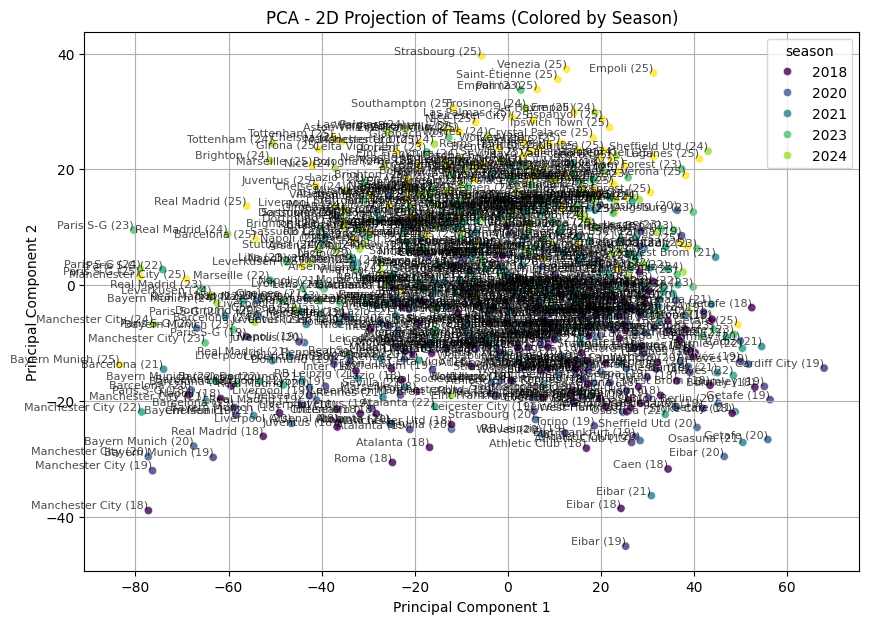

In [11]:
# Step 10: PCA Scatter Plot with Team Labels and Season Colors
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["season"], palette="viridis", alpha=0.8)

# Add Team Name Labels with Last 2 Digits of "Season"
for team, season, (x, y) in zip(pca_df.index, pca_df["season"], zip(pca_df["PC1"], pca_df["PC2"])):
    season_label = str(season)[-2:]  # Extract last 2 digits of season
    plt.text(x, y, f"{team} ({season_label})", fontsize=8, ha='right', va='bottom', alpha=0.7)

# Formatting the Plot
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Projection of Teams (Colored by Season)")
plt.grid(True)
plt.show()


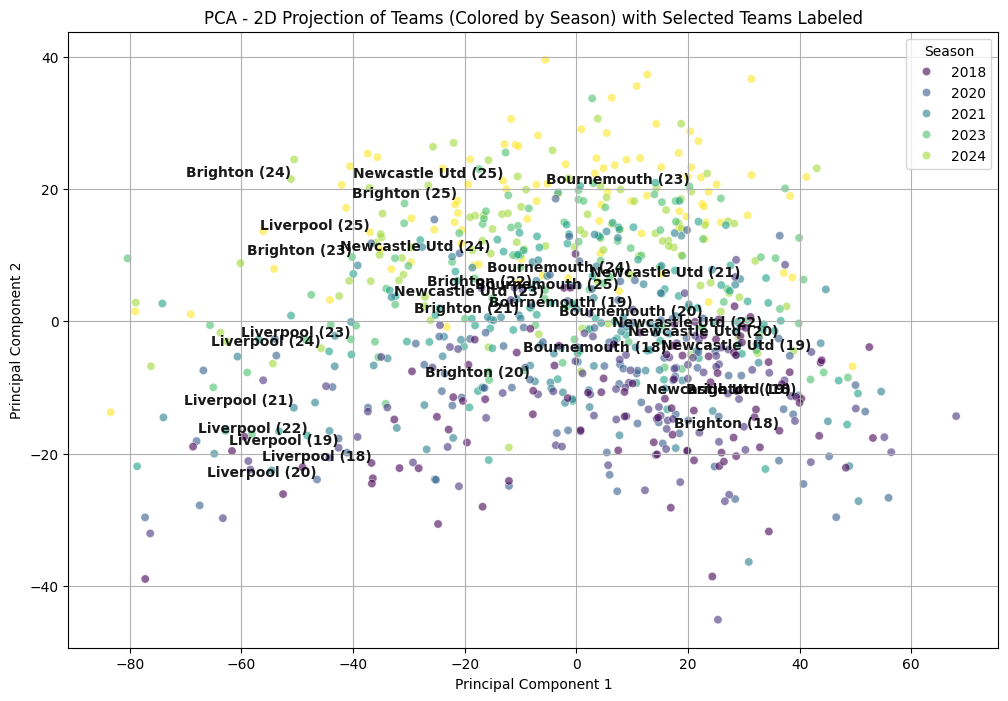

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the teams of interest
teams_of_interest = ["Liverpool", "Bournemouth", "Brighton", "Newcastle Utd"]

# Step 10: PCA Scatter Plot with All Data Points
plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["season"], palette="viridis", alpha=0.6)

# Filter the dataset for only the selected teams
filtered_pca_df = pca_df[pca_df.index.isin(teams_of_interest)]

# Add labels only for selected teams
for team, season, (x, y) in zip(filtered_pca_df.index, filtered_pca_df["season"], zip(filtered_pca_df["PC1"], filtered_pca_df["PC2"])):
    season_label = str(season)[-2:]  # Extract last 2 digits of season
    plt.text(x, y, f"{team} ({season_label})", fontsize=10, ha='right', va='bottom', alpha=0.9, fontweight="bold")

# Formatting the Plot
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Projection of Teams (Colored by Season) with Selected Teams Labeled")
plt.grid(True)
plt.legend(title="Season", bbox_to_anchor=(1, 1))
plt.show()


### repel, euclidean distance from 18 to 25

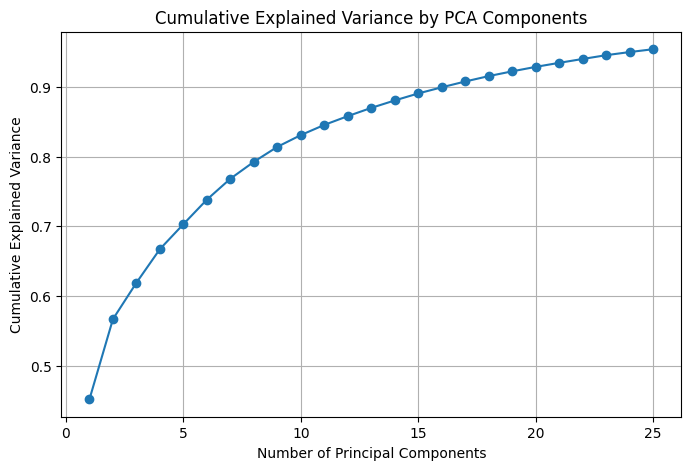

Cumulative Variance Explained by 25 components: 0.95


In [13]:
import matplotlib.pyplot as plt

# Check cumulative variance explained by PCA components
explained_variance_cumulative = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', linestyle='-')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by PCA Components")
plt.grid(True)
plt.show()

# Print final variance retained
print(f"Cumulative Variance Explained by {pca.n_components_} components: {explained_variance_cumulative[-1]:.2f}")


## PCA 

###### top 4 teams only

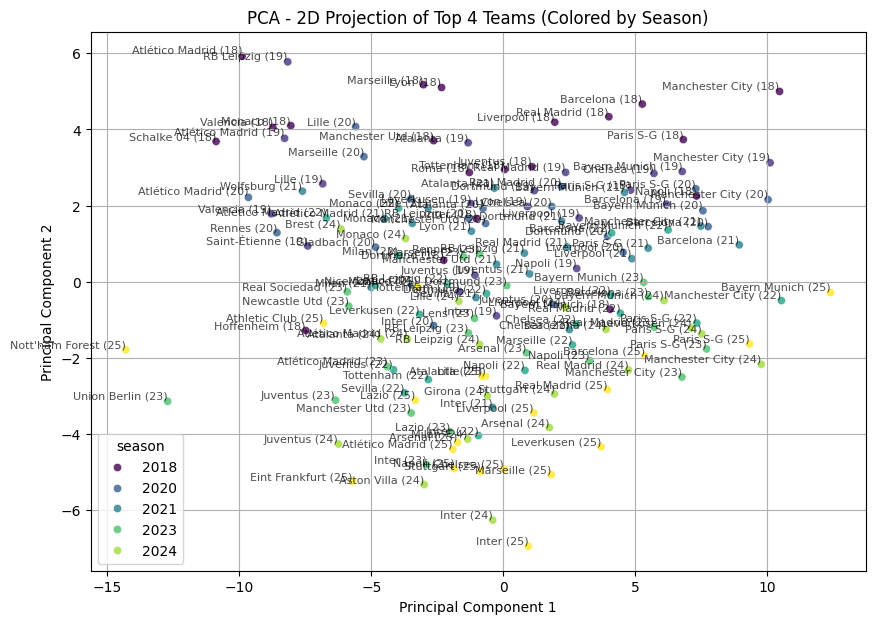

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter to only include the top 4 teams per season per league based on points_per_match
df_top4 = (df.iloc[:-98].sort_values(by=["season", "league", "points_per_match"], ascending=[True, True, False])
            .groupby(["season", "league"])
            .head(4))

# Step 2: Prepare Data for Regression (exclude "team", "season", "points_per_match")
X = df_top4.drop(columns=["team", "season", "points_per_match", "league"], errors="ignore")  
y = df_top4["points_per_match"]  # Target variable

# Step 3: Fit Linear Regression Model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Step 4: Extract Regression Coefficients & Apply Log Transformation
coefficients = np.abs(reg_model.coef_)  # Get absolute values of coefficients
log_weights = np.log(coefficients + 1e-5)  # Apply log transform (add small value to avoid log(0))

# Step 5: Select only numerical columns for PCA (matching regression features)
teams_data = df_top4.drop(columns=["team", "season", "points_per_match", "league"], errors="ignore")
teams_data = teams_data.select_dtypes(include=[np.number])  # Keep only numerical columns
teams_data = teams_data.loc[:, X.columns]  # Ensure it has the same columns as used in regression
teams_data = teams_data.set_index(df_top4["team"])  # Keep "team" as index

# Step 6: Standardize Data Before PCA
scaler = StandardScaler()
teams_scaled = scaler.fit_transform(teams_data)

# Step 7: Apply Log-Transformed Weights to Features
# weighted_teams_data = teams_scaled * log_weights[:teams_scaled.shape[1]]

# Step 8: Perform PCA with a Fixed Seed for Reproducibility
np.random.seed(42)  # Set random seed
pca = PCA(n_components=0.95, random_state=42)  # Retain 95% variance
teams_pca = pca.fit_transform(teams_scaled)

# Step 9: Create a DataFrame for PCA Results, keeping "team" and "season"
pca_df = pd.DataFrame(teams_pca, index=teams_data.index, columns=[f"PC{i+1}" for i in range(teams_pca.shape[1])])
pca_df["season"] = df_top4.set_index("team")["season"]  # Re-add "season" for labeling

# Step 10: PCA Scatter Plot with Team Labels and Season Colors
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["season"], palette="viridis", alpha=0.8)

# Add Team Name Labels with Last 2 Digits of "Season"
for team, season, (x, y) in zip(pca_df.index, pca_df["season"], zip(pca_df["PC1"], pca_df["PC2"])):
    season_label = str(season)[-2:]  # Extract last 2 digits of season
    plt.text(x, y, f"{team} ({season_label})", fontsize=8, ha='right', va='bottom', alpha=0.7)

# Formatting the Plot
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Projection of Top 4 Teams (Colored by Season)")
plt.grid(True)
plt.show()


               Team  Avg_Euclidean_Distance
27         Valencia                6.849326
25        Stuttgart                6.887459
19          Sevilla                6.976293
22          Arsenal                7.141453
6   Manchester City                7.343786
3       Real Madrid                7.473138
21            Milan                7.724259
14         Atalanta                7.726314
17   Manchester Utd                7.811839
12           Monaco                8.044292
20             Lyon                8.074031
8         Liverpool                8.168132
10         Dortmund                8.189069
5             Inter                8.224097
24        Tottenham                8.286375
1         Barcelona                8.442971
2         Paris S-G                8.475139
7          Juventus                8.759477
16            Lille                8.771899
15          Chelsea                8.908580
4   Atlético Madrid                9.086081
9        RB Leipzig             

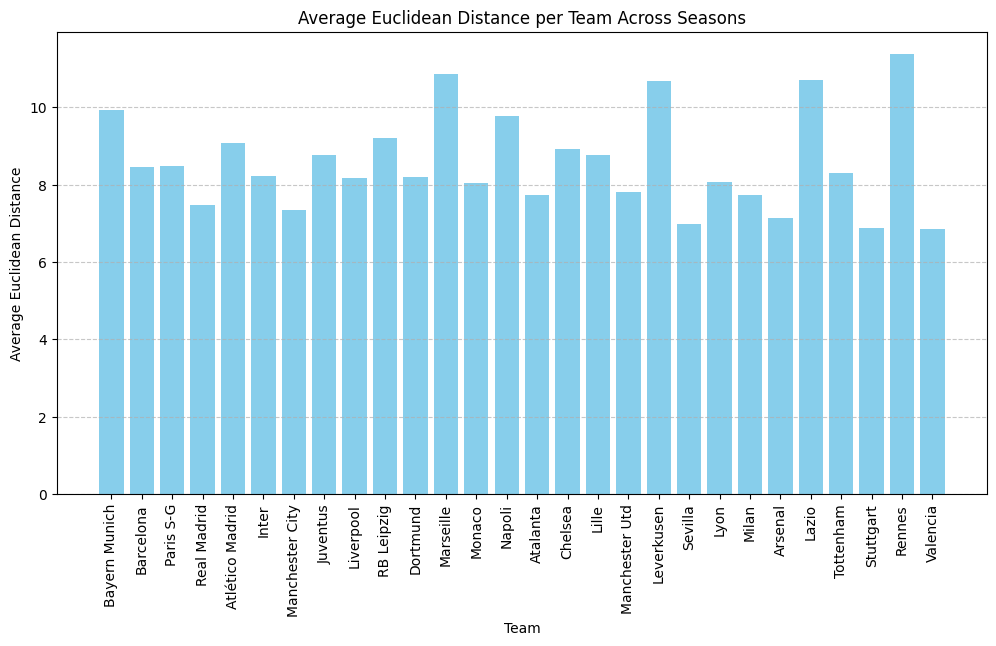

In [35]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

# Step 1: Identify teams that appear in multiple seasons
team_counts = pca_df.index.value_counts()
repeated_teams = team_counts[team_counts > 1].index  # Teams appearing in multiple seasons

# Step 2: Compute Euclidean distance for each repeated team
team_distances = []

for team in repeated_teams:
    team_data = pca_df.loc[team, :].filter(like="PC")  # Extract PCA components for the team
    
    # If only one row, skip
    if team_data.shape[0] < 2:
        continue
    
    # Compute pairwise Euclidean distances
    distances = pdist(team_data.values, metric="euclidean")
    
    # Compute the average distance
    avg_distance = np.mean(distances)
    team_distances.append({"Team": team, "Avg_Euclidean_Distance": avg_distance})

# Convert to DataFrame
distance_df = pd.DataFrame(team_distances)

# Display the results
print(distance_df.sort_values(by="Avg_Euclidean_Distance"))

# Step 3: Visualizing the Results
plt.figure(figsize=(12, 6))
plt.bar(distance_df["Team"], distance_df["Avg_Euclidean_Distance"], color='skyblue')
plt.xlabel("Team")
plt.ylabel("Average Euclidean Distance")
plt.title("Average Euclidean Distance per Team Across Seasons")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


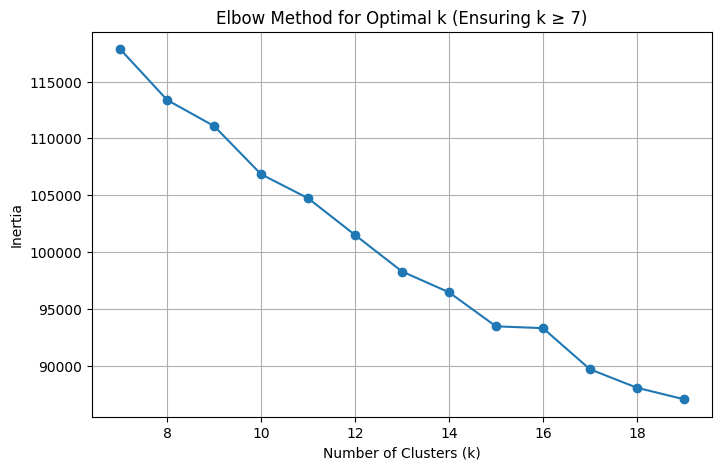

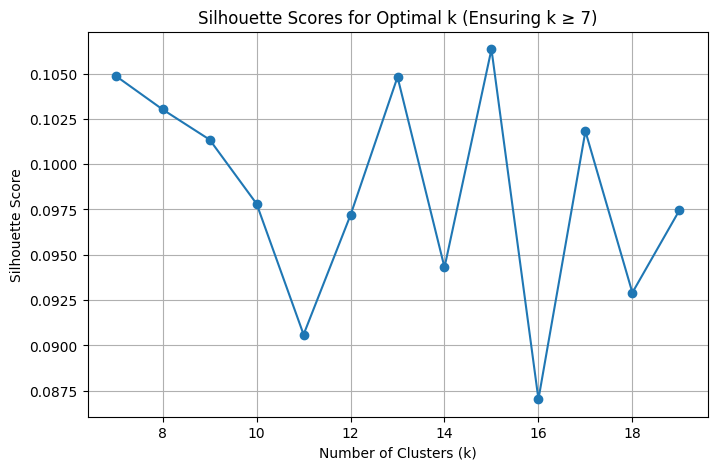

Optimal Number of Clusters (Ensuring k ≥ 7): 15


,Cluster,season
team,,
Bayern Munich,12,2018
Schalke 04,6,2018
Dortmund,11,2018
Hoffenheim,6,2018
Barcelona,3,2018
Atlético Madrid,6,2018
Real Madrid,3,2018
Valencia,6,2018
Paris S-G,3,2018


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Find the Optimal Number of Clusters Using the Elbow Method & Silhouette Score
inertia = []
silhouette_scores = []
cluster_range = range(7, 20)  # Ensure at least 7 clusters, testing up to 15

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_df.iloc[:, :-1])  # Exclude "season" column for clustering
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_df.iloc[:, :-1], kmeans.labels_))

# Step 2: Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k (Ensuring k ≥ 7)")
plt.grid(True)
plt.show()

# Step 3: Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Optimal k (Ensuring k ≥ 7)")
plt.grid(True)
plt.show()

# Step 4: Choose Optimal k (Ensuring Minimum of 7 Clusters)
optimal_k = cluster_range[np.argmax(silhouette_scores)]  # Select k with highest silhouette score
print(f"Optimal Number of Clusters (Ensuring k ≥ 7): {optimal_k}")

# Step 5: Apply K-Means Clustering with Optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
pca_df["Cluster"] = kmeans.fit_predict(pca_df.iloc[:, :-2])  # Exclude "season" from clustering

# Step 6: Create a Table with Team, Season, and Cluster Assignment
cluster_table = pca_df[["Cluster", "season"]]

# Display the Clustered DataFrame
import pandas as pd
from IPython.display import display

display(cluster_table)



In [17]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10).fit(pca_df.iloc[:, :-2])  # Adjust eps based on density
pca_df["DBSCAN_Cluster"] = dbscan.labels_  # Assign clusters

# Count unique clusters (excluding noise points)
num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print(f"DBSCAN found {num_clusters} clusters.")


DBSCAN found 0 clusters.


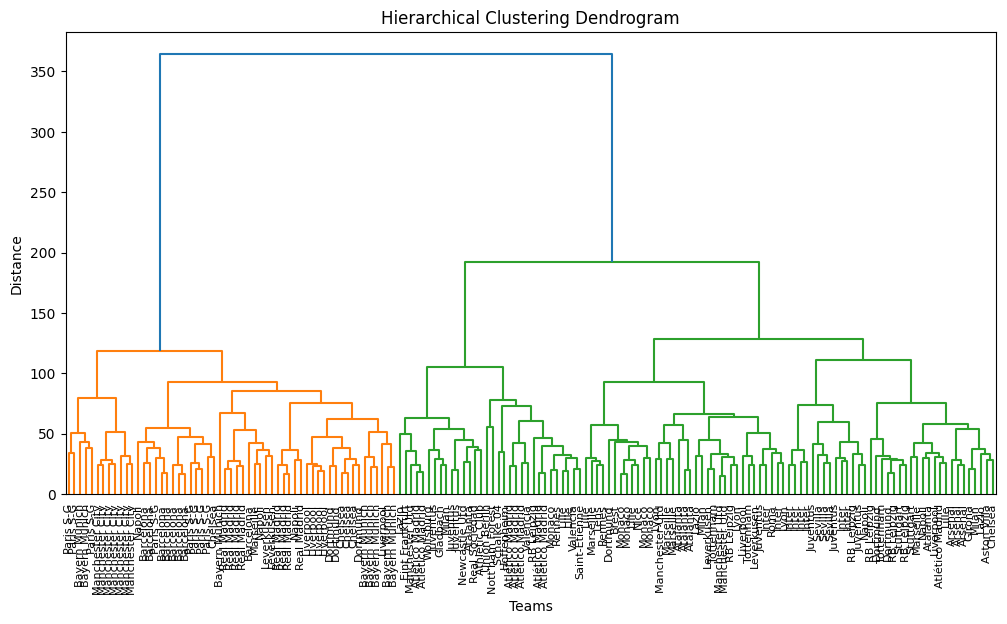

,season,Agglo_Cluster
team,,
Bayern Munich,2018,1
Schalke 04,2018,0
Dortmund,2018,3
Hoffenheim,2018,0
Barcelona,2018,7
Atlético Madrid,2018,0
Real Madrid,2018,12
Valencia,2018,0
Paris S-G,2018,7


In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Compute the linkage matrix for the dendrogram
linked = linkage(pca_df.iloc[:, :-2], method="ward")

# Plot Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=pca_df.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Teams")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=optimal_k)
pca_df["Agglo_Cluster"] = agglo.fit_predict(pca_df.iloc[:, :-2])

# Display Cluster Assignments
display(pca_df[["season", "Agglo_Cluster"]])


In [19]:
# Apply K-Means Clustering with k=11
optimal_k = 9  # From the silhouette score plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
pca_df["Cluster"] = kmeans.fit_predict(pca_df.iloc[:, :-2])  # Exclude "season"

# Create a Table with Team, Season, and Cluster Assignment
cluster_table = pca_df[["Cluster", "season"]]

# Display the Clustered DataFrame
from IPython.display import display
display(cluster_table)



,Cluster,season
team,,
Bayern Munich,8,2018
Schalke 04,2,2018
Dortmund,4,2018
Hoffenheim,2,2018
Barcelona,1,2018
Atlético Madrid,2,2018
Real Madrid,1,2018
Valencia,2,2018
Paris S-G,1,2018


### PCA (to reduce dimensionality and remove correlation) then t-SNE to cluster teams based on style similarities

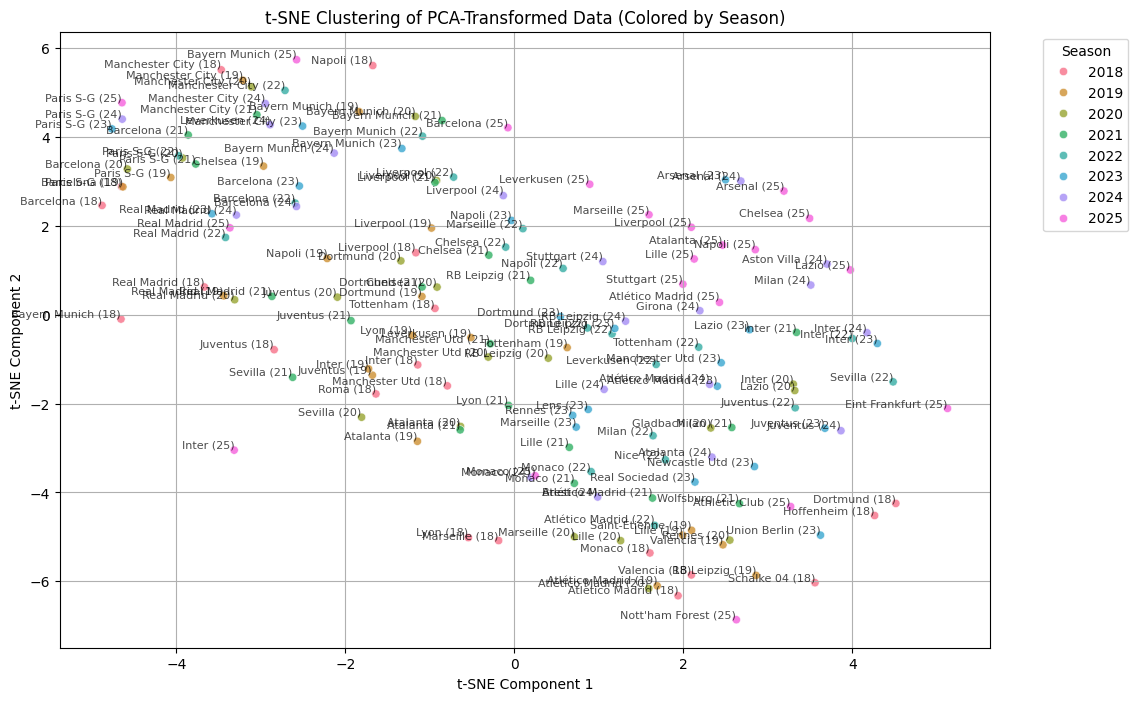

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Ensure pca_df is available and contains necessary columns
# Reduce PCA dimensions to speed up t-SNE
pca_features = pca_df.filter(like="PC").iloc[:, :60]  # Keep only first 10 PCA components

# Apply t-SNE with optimizations
tsne = TSNE(n_components=2, perplexity=50, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(pca_features)

# Create a DataFrame for t-SNE results
tsne_df = pd.DataFrame(X_tsne, index=pca_df.index, columns=["t-SNE Component 1", "t-SNE Component 2"])
tsne_df["season"] = pca_df["season"].astype(str)  # Convert season to string to ensure all categories appear

# Scatter plot of t-SNE results with team labels
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x=tsne_df["t-SNE Component 1"], 
    y=tsne_df["t-SNE Component 2"], 
    hue=tsne_df["season"], 
    palette=sns.color_palette("husl", n_colors=len(tsne_df["season"].unique())),
    alpha=0.8
)

# Add Team Name Labels with Last 2 Digits of "Season"
for team, season, (x, y) in zip(tsne_df.index, tsne_df["season"], zip(tsne_df["t-SNE Component 1"], tsne_df["t-SNE Component 2"])):
    season_label = str(season)[-2:]  # Extract last 2 digits of season
    plt.text(x, y, f"{team} ({season_label})", fontsize=8, ha='right', va='bottom', alpha=0.7)

# Formatting the plot
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Clustering of PCA-Transformed Data (Colored by Season)")
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


               Team  Avg_Euclidean_Distance
22          Arsenal                0.492108
6   Manchester City                0.696819
27         Valencia                0.774012
2         Paris S-G                0.972541
25        Stuttgart                1.076008
12           Monaco                1.098723
3       Real Madrid                1.114021
8         Liverpool                1.558637
17   Manchester Utd                1.831876
23            Lazio                2.020469
1         Barcelona                2.127098
24        Tottenham                2.197920
0     Bayern Munich                2.245579
9        RB Leipzig                2.677383
21            Milan                2.721310
4   Atlético Madrid                3.023920
15          Chelsea                3.135170
14         Atalanta                3.165873
20             Lyon                3.186837
10         Dortmund                3.243596
26           Rennes                3.369075
16            Lille             

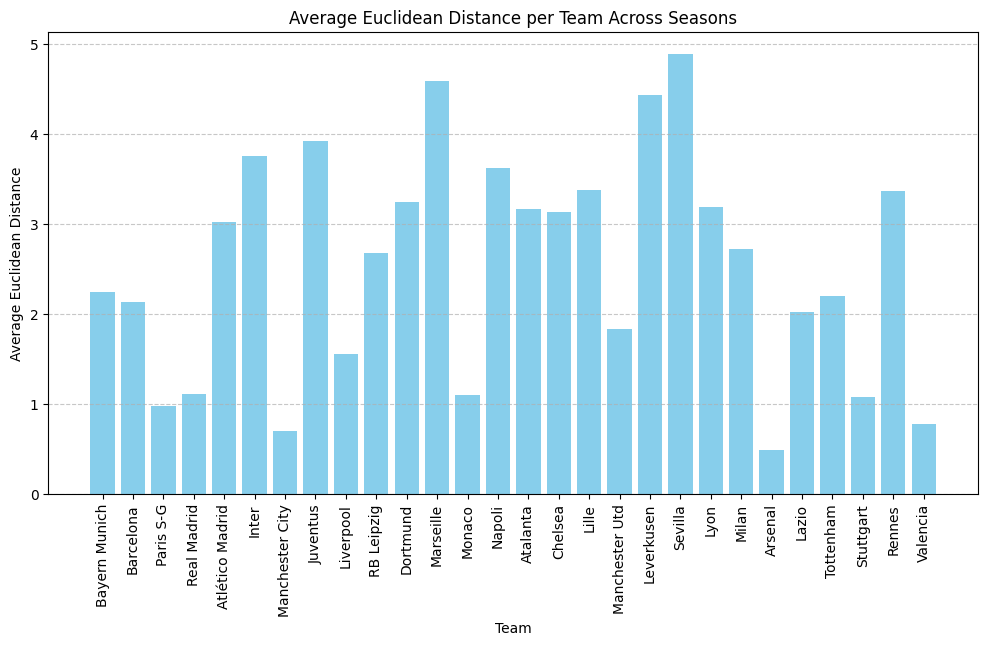

In [38]:
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Step 1: Identify teams that appear in multiple seasons
team_counts = tsne_df.index.value_counts()
repeated_teams = team_counts[team_counts > 1].index  # Teams appearing in multiple seasons

# Step 2: Compute Euclidean distance for each repeated team
team_distances = []

for team in repeated_teams:
    team_data = tsne_df.loc[team, ["t-SNE Component 1", "t-SNE Component 2"]]  # Extract t-SNE components
    
    # If only one row, skip
    if team_data.shape[0] < 2:
        continue
    
    # Compute pairwise Euclidean distances
    distances = pdist(team_data.values, metric="euclidean")
    
    # Compute the average distance
    avg_distance = np.mean(distances)
    team_distances.append({"Team": team, "Avg_Euclidean_Distance": avg_distance})

# Convert to DataFrame
distance_df = pd.DataFrame(team_distances)

# Display the table
print(distance_df.sort_values(by="Avg_Euclidean_Distance"))

# Step 3: Visualizing the Results
plt.figure(figsize=(12, 6))
plt.bar(distance_df["Team"], distance_df["Avg_Euclidean_Distance"], color='skyblue')
plt.xlabel("Team")
plt.ylabel("Average Euclidean Distance")
plt.title("Average Euclidean Distance per Team Across Seasons")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


  Season  Avg_Euclidean_Distance
0   2018                5.883938
1   2019                5.056528
2   2020                5.103700
3   2021                4.458628
4   2022                4.459201
5   2023                4.689869
6   2024                4.883248
7   2025                5.125261


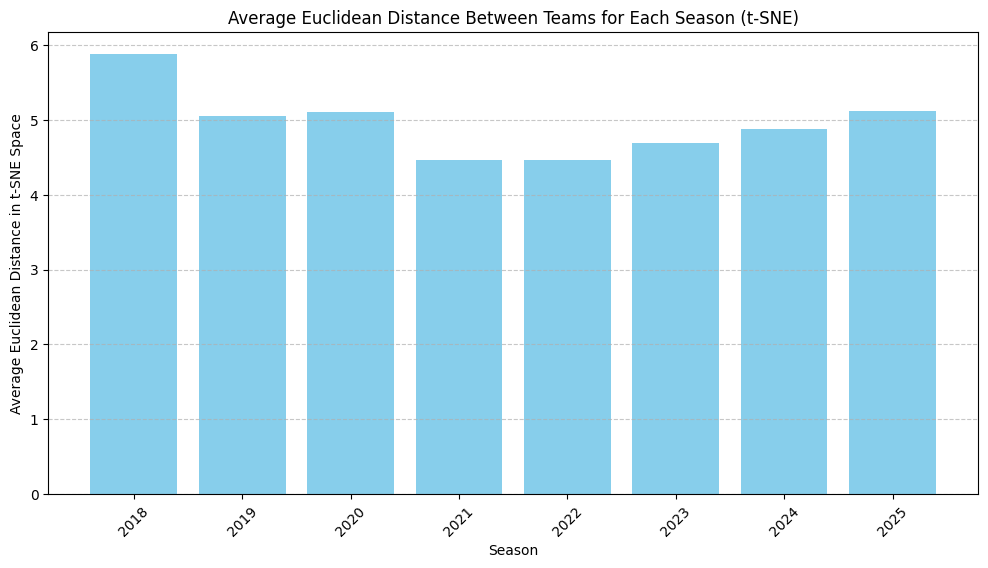

In [42]:
from scipy.spatial.distance import pdist

# Step 1: Extract unique seasons from the t-SNE results
seasons = tsne_df["season"].unique()

# Step 2: Compute Euclidean distance for each season in t-SNE space
season_tsne_distances = []

for season in seasons:
    season_data = tsne_df[tsne_df["season"] == season].filter(like="t-SNE Component")  # Extract t-SNE components
    
    # If only one team in the season, skip
    if season_data.shape[0] < 2:
        continue
    
    # Compute pairwise Euclidean distances
    distances = pdist(season_data.values, metric="euclidean")
    
    # Compute the average distance
    avg_distance = np.mean(distances)
    season_tsne_distances.append({"Season": season, "Avg_Euclidean_Distance": avg_distance})

# Convert to DataFrame
season_tsne_distance_df = pd.DataFrame(season_tsne_distances).sort_values(by="Season")

# Display the table
print(season_tsne_distance_df)

# Step 3: Plot the distances for visualization
plt.figure(figsize=(12, 6))
plt.bar(season_tsne_distance_df["Season"], season_tsne_distance_df["Avg_Euclidean_Distance"], color='skyblue')
plt.xlabel("Season")
plt.ylabel("Average Euclidean Distance in t-SNE Space")
plt.title("Average Euclidean Distance Between Teams for Each Season (t-SNE)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


   Season_Gap  Avg_Euclidean_Distance
0           1                2.388442
1           2                2.510047
2           3                3.082450
3           4                3.372994
4           5                3.763069
5           6                4.920474
6           7                4.647249


C:\Users\ariel\AppData\Local\Temp\ipykernel_8156\3762214543.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_4_per_season = tsne_df.groupby("season").apply(lambda x: x.nlargest(4, "t-SNE Component 1")).reset_index(drop=True)


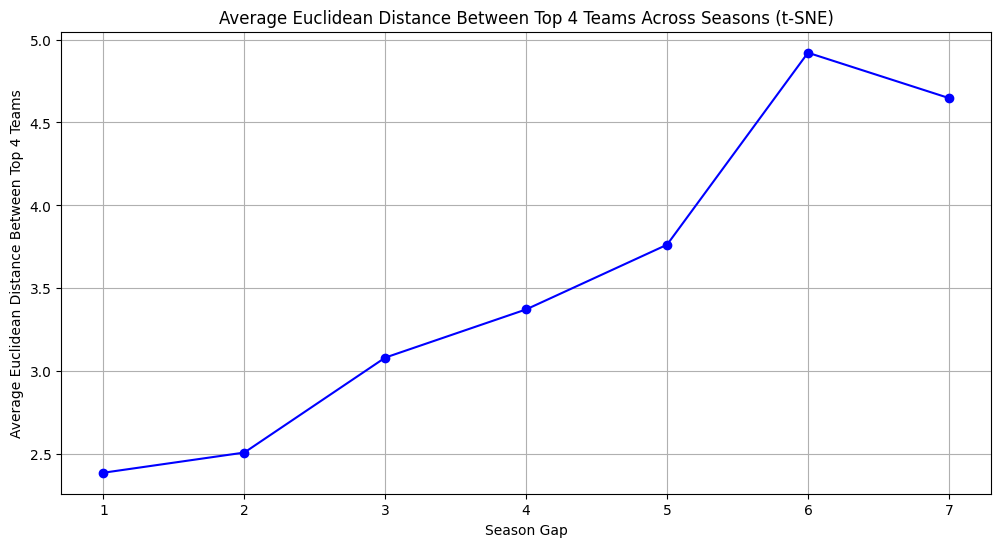

In [43]:
from scipy.spatial.distance import cdist


# Filter the dataset to only include the top 4 teams per season
top_4_per_season = tsne_df.groupby("season").apply(lambda x: x.nlargest(4, "t-SNE Component 1")).reset_index(drop=True)

# Step 1: Extract unique seasons and sort them
seasons = sorted(top_4_per_season["season"].unique(), key=int)

# Step 2: Compute Euclidean distance between top 4 teams that are n seasons apart
season_gaps = range(1, len(seasons))  # 1 season apart, 2 seasons apart, etc.
season_gap_distances = []

for gap in season_gaps:
    distances_for_gap = []

    for i in range(len(seasons) - gap):
        season_1 = seasons[i]
        season_2 = seasons[i + gap]

        # Extract t-SNE components for both seasons (only top 4 teams)
        season_1_data = top_4_per_season[top_4_per_season["season"] == season_1].filter(like="t-SNE Component")
        season_2_data = top_4_per_season[top_4_per_season["season"] == season_2].filter(like="t-SNE Component")

        # Ensure both seasons have data
        if season_1_data.shape[0] > 0 and season_2_data.shape[0] > 0:
            # Compute pairwise Euclidean distances between teams from different seasons
            distances = cdist(season_1_data.values, season_2_data.values, metric="euclidean")
            
            # Compute the average distance
            avg_distance = np.mean(distances)
            distances_for_gap.append(avg_distance)

    # Compute the average distance for the given season gap
    if distances_for_gap:
        season_gap_distances.append({"Season_Gap": gap, "Avg_Euclidean_Distance": np.mean(distances_for_gap)})

# Convert to DataFrame
season_gap_distance_df = pd.DataFrame(season_gap_distances)

# Display the table
print(season_gap_distance_df)

# Step 3: Plot the distances for visualization
plt.figure(figsize=(12, 6))
plt.plot(season_gap_distance_df["Season_Gap"], season_gap_distance_df["Avg_Euclidean_Distance"], marker='o', linestyle='-', color='blue')
plt.xlabel("Season Gap")
plt.ylabel("Average Euclidean Distance Between Top 4 Teams")
plt.title("Average Euclidean Distance Between Top 4 Teams Across Seasons (t-SNE)")
plt.grid(True)
plt.xticks(season_gap_distance_df["Season_Gap"])
plt.show()
